In [109]:
# Python ≥3.5 is required
import sys
assert sys.version_info 

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ 

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [110]:
import tensorflow as tf
from tensorflow import keras

In [111]:
fashion_mnist = keras.datasets.fashion_mnist

In [112]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [113]:
X_train_full.shape

(60000, 28, 28)

In [114]:
X_train_full.dtype

dtype('uint8')

In [115]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.


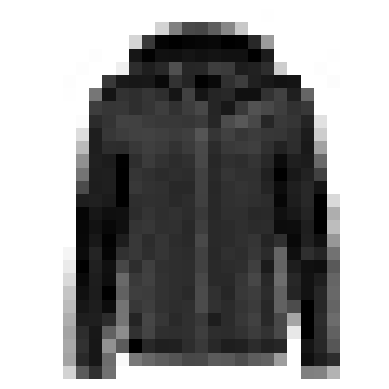

In [116]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [117]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [118]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [119]:
class_names[y_train[0]]

'Coat'

In [120]:
X_valid.shape

(5000, 28, 28)

In [121]:
X_test.shape

(10000, 28, 28)

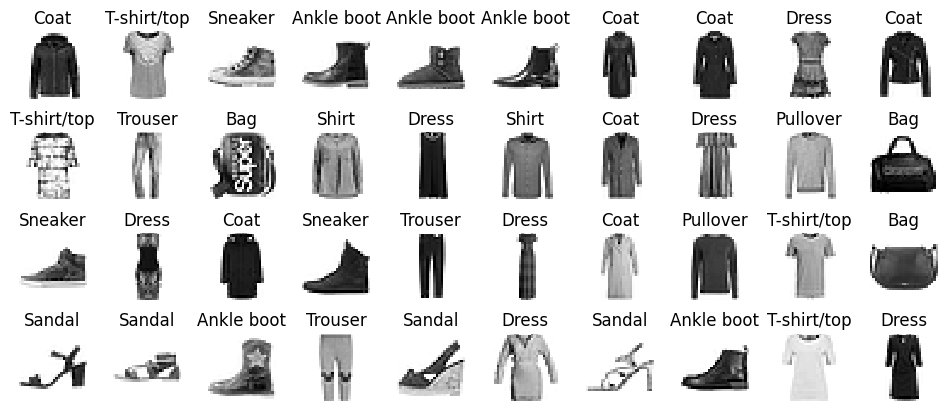

In [122]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in  range(n_cols):
        index=n_cols*row +col
        # print(n_cols)
        # print(n_cols*row)
        # print(col)
        # print(n_cols*row +col)
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=.2,hspace=.5)
plt.show()

In [123]:
model=keras.models.Sequential()

In [124]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)


In [125]:
model.layers

In [126]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
hidden1 = model.layers[3]
hidden1.name

'dense_2'

In [129]:
model.get_layer(hidden1.name) is hidden1

True

In [130]:
weights, biases = hidden1.get_weights()

In [134]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [135]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [136]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 10s 5ms/step - loss: 0.7233 - accuracy: 0.7629 - val_loss: 0.5204 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4928 - accuracy: 0.8279 - val_loss: 0.4455 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4447 - accuracy: 0.8438 - val_loss: 0.5319 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4166 - accuracy: 0.8553 - val_loss: 0.3968 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3973 - accuracy: 0.8605 - val_loss: 0.3803 - val_accuracy: 0.8726
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3783 - accuracy: 0.8661 - val_loss: 0.3749 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3655 - accuracy: 0.8716 - val_loss: 0.3669 - val_accura

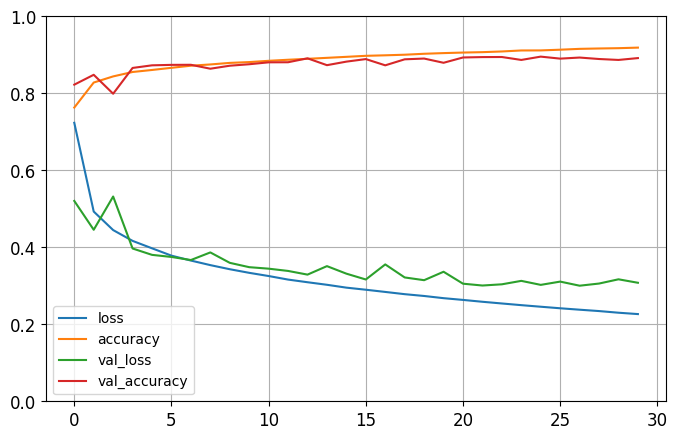

In [138]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [140]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8821


[0.33908021450042725, 0.882099986076355]

In [148]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 45ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [155]:
y_pred = model.predict(X_new)
y_pred= np.argmax(y_proba, axis=1)

1/1 [==============================] - 0s 32ms/step


In [158]:
# class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
#                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [159]:
print(y_pred)

[9 2 1]


In [160]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

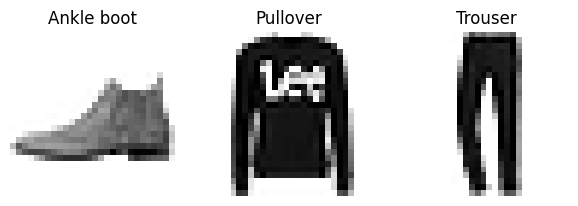

In [162]:
y_new=y_test[:3]
plt.figure(figsize=(7.2,2.4))
for index,image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap='binary',interpolation='nearest')
    plt.axis("off")
    plt.title(class_names[y_test[index]],fontsize=12)

plt.subplots_adjust(wspace=.2,hspace=.5)
plt.show()
